In [6]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image

In [7]:
dataset = CIFAR10('../CIFAR10')

Pre-loading training data
Pre-loading test data


In [2]:
import sklearn
print(sklearn.__version__)

0.19.1


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

In [4]:
n_splits = 3
kf = StratifiedKFold(n_splits)

In [5]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images_hog'], dataset.train['labels']):
    train_x = dataset.train['images_hog'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier()
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images_hog'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

C:\Users\Administrateur\Anaconda2\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 77.06 %
Confusion matrix:
[[ 3927.   669.   208.]
 [  716.  3546.   706.]
 [  357.   785.  4086.]]


In [10]:
print(clf.coefs_[0].shape, clf.coefs_[1].shape)

(256, 100) (100, 3)


In [11]:
c0 = clf.coefs_[0][:,0]
print(c0.shape) # Input -> Neuron 0 hidden layer

(256,)


(256, 100) (100, 3)


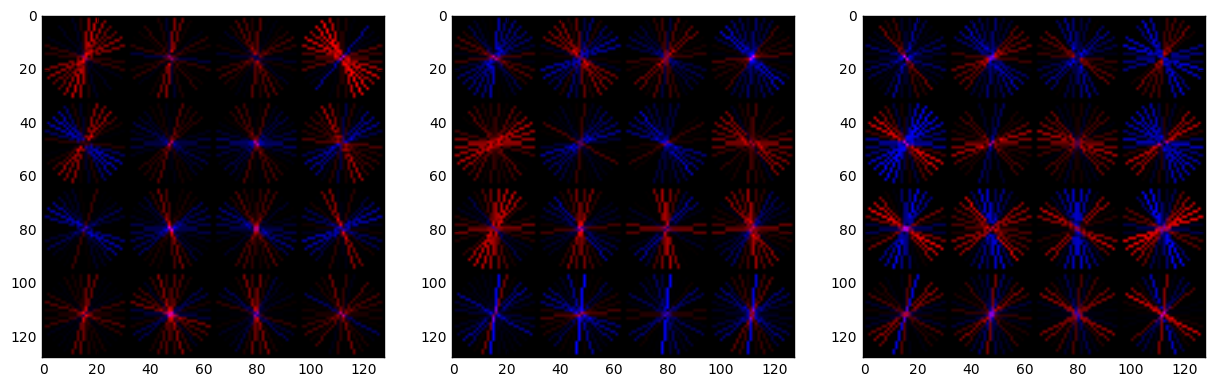

In [84]:
i2l0 = clf.coefs_[0]
l02o = clf.coefs_[1]
print(i2l0.shape, l02o.shape)

i2o = np.zeros((256,3))
for c in range(3):
    for k in range(100):
        i2o[:,c] += i2l0[:,k]*l02o[k,c]

airplane = get_hog_image(i2o[:,0].reshape((4,4,16)),128)
bird = get_hog_image(i2o[:,1].reshape((4,4,16)),128)
horse = get_hog_image(i2o[:,2].reshape((4,4,16)),128)
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.imshow(airplane)
plt.subplot(1,3,2)
plt.imshow(bird)
plt.subplot(1,3,3)
plt.imshow(horse)
plt.show()

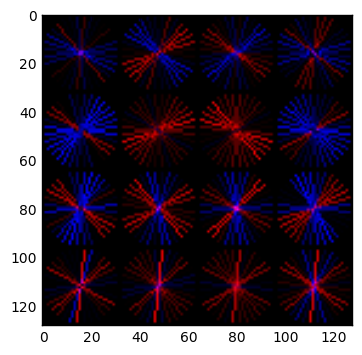

In [77]:
from skimage import draw
from matplotlib import pyplot as plt
%matplotlib inline

def get_hog_image(hog, output_size):
    orientations = 16
    cells = 4
    pxcell = output_size//cells
    
    radius = pxcell//2 - 1
    orientations_arr = np.arange(orientations)
    orientation_bin_midpoints = (np.pi * (orientations_arr + .5) / orientations)
    dr_arr = radius * np.sin(orientation_bin_midpoints)
    dc_arr = radius * np.cos(orientation_bin_midpoints)
    if( hog.min() < 0 ): # If we are looking at neural network weights
        hog_image = np.zeros((cells*pxcell, cells*pxcell,3), dtype=float)
        norm = np.abs(hog).max()
    else: # If we are looking at actual HoGs from the dataset
        hog_image = np.zeros((cells*pxcell, cells*pxcell), dtype=float)
    for r in range(cells):
        for c in range(cells):
            for o, dr, dc in zip(orientations_arr, dr_arr, dc_arr):
                centre = tuple([r * pxcell + pxcell // 2,
                                c * pxcell + pxcell // 2])
                rr, cc = draw.line(int(centre[0] - dc),
                                   int(centre[1] + dr),
                                   int(centre[0] + dc),
                                   int(centre[1] - dr))
                if hog.min() < 0:
                    if( hog[r,c,o] >= 0 ):
                        hog_image[rr, cc, 2] += hog[r, c, o]/norm
                    else:
                        hog_image[rr, cc, 0] -= hog[r, c, o]/norm
                else:
                    hog_image[rr, cc] += hog[r, c, o]
    return hog_image

idx = 55
#hog = dataset.train['images_hog'][idx].reshape((4,4,orientations))
hog = clf.coefs_[0][:,idx].reshape((4,4,16))
hog_image = get_hog_image(hog, 128)
plt.figure()
#plt.imshow(dataset.train['images'][idx].reshape((32,32,3)))
plt.imshow(hog_image)
plt.show()

In [8]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images_pca'], dataset.train['labels']):
    train_x = dataset.train['images_pca'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier()
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images_pca'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

Accuracy: 66.77 %
Confusion matrix:
[[ 3522.   846.   552.]
 [  851.  3031.   986.]
 [  627.  1123.  3462.]]


In [9]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images_gs'], dataset.train['labels']):
    train_x = dataset.train['images_gs'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier()
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images_gs'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

Accuracy: 43.82 %
Confusion matrix:
[[ 2867.  2305.  1784.]
 [ 1533.  1958.  1468.]
 [  600.   737.  1748.]]


In [10]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images'], dataset.train['labels']):
    train_x = dataset.train['images'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier()
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

Accuracy: 49.76 %
Confusion matrix:
[[ 3897.  2473.  2311.]
 [  927.  2224.  1345.]
 [  176.   303.  1344.]]


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

n_splits = 3
kf = StratifiedKFold(n_splits)

n_neurons = np.arange(50,400,50)
for nn in n_neurons:
    acc_s = 0
    cm_s = np.zeros((3,3))
    for train,test in kf.split(dataset.train['images_hog'], dataset.train['labels']):
        train_x = dataset.train['images_hog'][train]
        train_y = dataset.train['labels'][train]

        clf = MLPClassifier(hidden_layer_sizes=(nn,))
        clf.fit(train_x, train_y)

        test_x = dataset.train['images_hog'][test]
        test_y = dataset.train['labels'][test]

        acc, cm = evaluate_classifier(clf, test_x, test_y)
        acc_s += acc/n_splits
        cm_s += cm
    
    print("%d neurons"%nn)
    print("Accuracy: %.2f %%"%acc_s)
    print("Confusion matrix:")
    print(cm_s)

C:\Users\Administrateur\Anaconda2\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


50 neurons
Accuracy: 75.99 %
Confusion matrix:
[[ 3879.   678.   232.]
 [  757.  3468.   716.]
 [  364.   854.  4052.]]
100 neurons
Accuracy: 77.21 %
Confusion matrix:
[[ 3915.   654.   212.]
 [  754.  3557.   678.]
 [  331.   789.  4110.]]
150 neurons
Accuracy: 77.55 %
Confusion matrix:
[[ 3857.   590.   195.]
 [  807.  3718.   748.]
 [  336.   692.  4057.]]
200 neurons
Accuracy: 77.73 %
Confusion matrix:
[[ 3966.   665.   224.]
 [  714.  3602.   684.]
 [  320.   733.  4092.]]
250 neurons
Accuracy: 78.81 %
Confusion matrix:
[[ 3974.   626.   189.]
 [  739.  3724.   687.]
 [  287.   650.  4124.]]
300 neurons
Accuracy: 79.21 %
Confusion matrix:
[[ 3979.   626.   176.]
 [  700.  3664.   585.]
 [  321.   710.  4239.]]
350 neurons
Accuracy: 78.65 %
Confusion matrix:
[[ 3988.   610.   178.]
 [  693.  3653.   665.]
 [  319.   737.  4157.]]


In [16]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images_hog'], dataset.train['labels']):
    train_x = dataset.train['images_hog'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier(hidden_layer_sizes=(100,10,), max_iter=400)
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images_hog'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

C:\Users\Administrateur\Anaconda2\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 77.47 %
Confusion matrix:
[[ 3833.   619.   194.]
 [  833.  3663.   682.]
 [  334.   718.  4124.]]


In [17]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images_hog'], dataset.train['labels']):
    train_x = dataset.train['images_hog'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier(hidden_layer_sizes=(300,10,), max_iter=1000)
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images_hog'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

Accuracy: 76.97 %
Confusion matrix:
[[ 4037.   697.   275.]
 [  624.  3432.   649.]
 [  339.   871.  4076.]]


In [15]:
acc_s = 0
cm_s = np.zeros((3,3))
for train,test in kf.split(dataset.train['images_hog'], dataset.train['labels']):
    train_x = dataset.train['images_hog'][train]
    train_y = dataset.train['labels'][train]
    
    clf = MLPClassifier(hidden_layer_sizes=(100,10,10,), max_iter=400)
    clf.fit(train_x, train_y)
    
    test_x = dataset.train['images_hog'][test]
    test_y = dataset.train['labels'][test]

    acc, cm = evaluate_classifier(clf, test_x, test_y)
    acc_s += acc/n_splits
    cm_s += cm

print("Accuracy: %.2f %%"%acc_s)
print("Confusion matrix:")
print(cm_s)

C:\Users\Administrateur\Anaconda2\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy: 76.38 %
Confusion matrix:
[[ 3992.   743.   268.]
 [  691.  3477.   744.]
 [  317.   780.  3988.]]


In [5]:
clf = MLPClassifier(hidden_layer_sizes=(300,))
clf.fit(dataset.train['images_hog'], dataset.train['labels'])

print(evaluate_classifier(clf, dataset.test['images_hog'], dataset.test['labels']))

C:\Users\Administrateur\Anaconda2\envs\py35\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(81.333333333333329, array([[840, 110,  34],
       [119, 755, 121],
       [ 41, 135, 845]], dtype=int64))


In [6]:
print(evaluate_classifier(clf, dataset.train['images_hog'], dataset.train['labels']))

(91.63333333333334, array([[4574,  265,   59],
       [ 299, 4459,  229],
       [ 127,  276, 4712]], dtype=int64))
